In [44]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from eval_utils import rouge_score, bert

In [45]:
cnn_directory = './inference_outputs/cnn/'
xsum_directory = './inference_outputs/xsum/'
file_names_cnn, file_names_xsum = [], []


In [46]:
rouge_scores_list_cnn = []
bert_scores_list_cnn = []
for filename in os.listdir(cnn_directory):
    if filename.endswith(".json"):
        filepath = os.path.join(cnn_directory, filename)
        with open(filepath, 'r') as json_file:
            data = json.load(json_file)

        generated_summaries = [sample['generated'] for sample in data]
        reference_summaries = [sample['reference'] for sample in data]

        rouge_scores = rouge_score(generated_summaries, reference_summaries)
        rouge_scores_list_cnn.append(rouge_scores)

        precision_bert, recall_bert, f1_bert = bert(generated_summaries, reference_summaries)
        bert_scores_list_cnn.append((precision_bert.mean().item(), recall_bert.mean().item(), f1_bert.mean().item()))

        file_names_cnn.append(filename.replace('_abisee_cnn_dailymail_summaries.json', ''))

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['ro

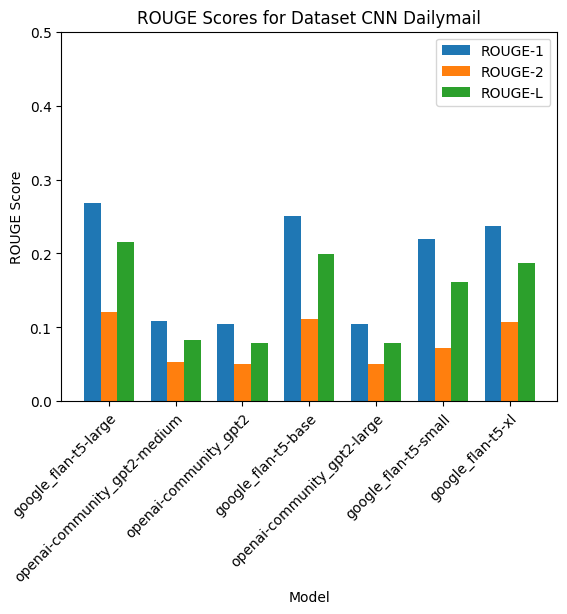

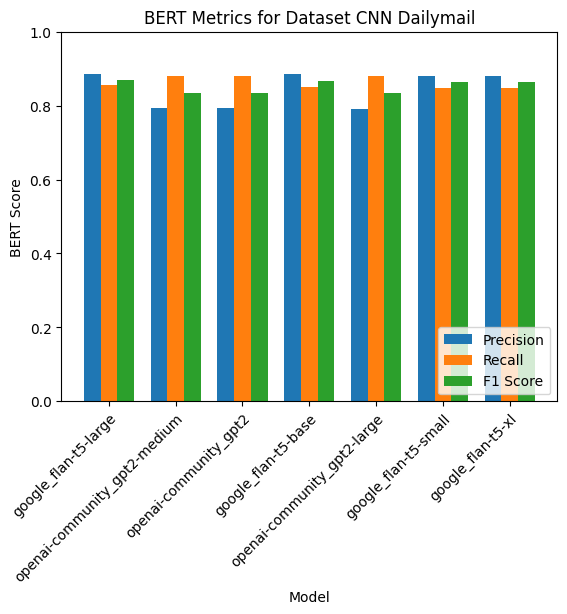

In [47]:
rouge_1_scores = [scores['rouge1'] for scores in rouge_scores_list_cnn]
rouge_2_scores = [scores['rouge2'] for scores in rouge_scores_list_cnn]
rouge_l_scores = [scores['rougeL'] for scores in rouge_scores_list_cnn]

N = len(file_names_cnn)
ind = np.arange(N)  
width = 0.25

plt.bar(ind, rouge_1_scores, width=width, label='ROUGE-1')
plt.bar(ind+width, rouge_2_scores, width=width, label='ROUGE-2')
plt.bar(ind+width*2, rouge_l_scores, width=width, label='ROUGE-L')
plt.xticks(ind+width, file_names_cnn, rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel('Model')
plt.ylim(0, 0.5)
plt.ylabel('ROUGE Score')
plt.title('ROUGE Scores for Dataset CNN Dailymail')
plt.legend(loc='upper right')
plt.show()

precision_scores = [scores[0] for scores in bert_scores_list_cnn]
recall_scores = [scores[1] for scores in bert_scores_list_cnn]
f1_scores = [scores[2] for scores in bert_scores_list_cnn]

plt.bar(ind, precision_scores, width=width, label='Precision')
plt.bar(ind+width, recall_scores, width=width, label='Recall')
plt.bar(ind+width*2, f1_scores, width=width, label='F1 Score')
plt.xticks(ind+width, file_names_cnn, rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel('Model')
plt.ylim(0, 1.0)
plt.ylabel('BERT Score')
plt.title('BERT Metrics for Dataset CNN Dailymail')
plt.legend(loc='lower right')
plt.show()


In [48]:
rouge_scores_list_xsum = []
bert_scores_list_xsum = []
for filename in os.listdir(xsum_directory):
    if filename.endswith(".json"):
        filepath = os.path.join(xsum_directory, filename)
        with open(filepath, 'r') as json_file:
            data = json.load(json_file)

        generated_summaries = [sample['generated'] for sample in data]
        reference_summaries = [sample['reference'] for sample in data]

        rouge_scores = rouge_score(generated_summaries, reference_summaries)
        rouge_scores_list_xsum.append(rouge_scores)

        precision_bert, recall_bert, f1_bert = bert(generated_summaries, reference_summaries)
        bert_scores_list_xsum.append((precision_bert.mean().item(), recall_bert.mean().item(), f1_bert.mean().item()))

        file_names_xsum.append(filename.replace('_EdinburghNLP_xsum_summaries.json', ''))

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['ro

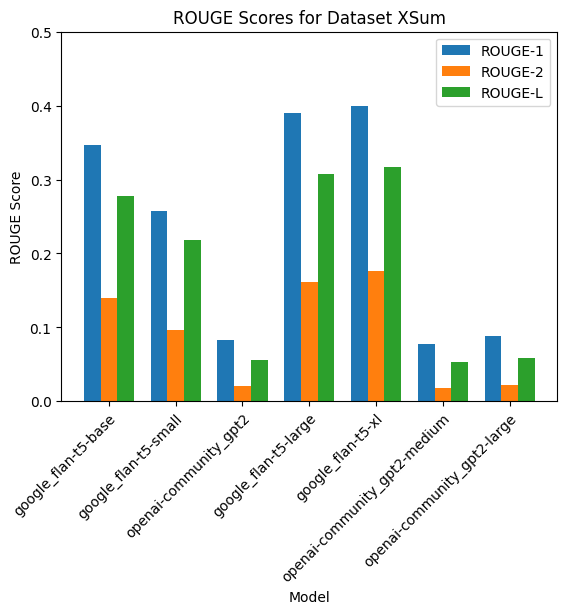

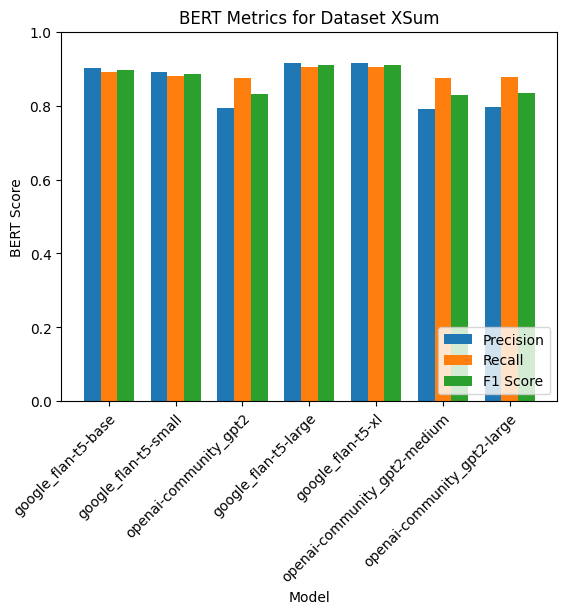

In [49]:
rouge_1_scores = [scores['rouge1'] for scores in rouge_scores_list_xsum]
rouge_2_scores = [scores['rouge2'] for scores in rouge_scores_list_xsum]
rouge_l_scores = [scores['rougeL'] for scores in rouge_scores_list_xsum]

N = len(file_names_xsum)
ind = np.arange(N)  
width = 0.25

plt.bar(ind, rouge_1_scores, width=width, label='ROUGE-1')
plt.bar(ind+width, rouge_2_scores, width=width, label='ROUGE-2')
plt.bar(ind+width*2, rouge_l_scores, width=width, label='ROUGE-L')
plt.xticks(ind+width, file_names_xsum, rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel('Model')
plt.ylim(0, 0.5)
plt.ylabel('ROUGE Score')
plt.title('ROUGE Scores for Dataset XSum')
plt.legend(loc='upper right')
plt.show()

precision_scores = [scores[0] for scores in bert_scores_list_xsum]
recall_scores = [scores[1] for scores in bert_scores_list_xsum]
f1_scores = [scores[2] for scores in bert_scores_list_xsum]

plt.bar(ind, precision_scores, width=width, label='Precision')
plt.bar(ind+width, recall_scores, width=width, label='Recall')
plt.bar(ind+width*2, f1_scores, width=width, label='F1 Score')
plt.xticks(ind+width, file_names_xsum, rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel('Model')
plt.ylim(0, 1.0)
plt.ylabel('BERT Score')
plt.title('BERT Metrics for Dataset XSum')
plt.legend(loc='lower right')
plt.show()

This is for the overall and average (divided by 30) execution time for 30 samples.

In [50]:
execution_time_directory = './execution_times/'
for filename in os.listdir(execution_time_directory):
    if filename.endswith(".json"):
        filepath = os.path.join(execution_time_directory, filename)
        with open(filepath, 'r') as json_file:
            data = json.load(json_file)

        for key, value in data.items():
            parts = key.replace('_', ' ').replace('/', ' ').split()
            formatted_key = ' '.join(parts)
            formatted_value = f"{value:.2f} seconds"
            divided_value = f"{value / 30:.2f} seconds"

            print(f"{formatted_key}: {formatted_value}")
            print(f"{formatted_key} (divided by 30): {divided_value}")

google flan-t5-base EdinburghNLP xsum: 89.42 seconds
google flan-t5-base EdinburghNLP xsum (divided by 30): 2.98 seconds
google flan-t5-small EdinburghNLP xsum: 33.62 seconds
google flan-t5-small EdinburghNLP xsum (divided by 30): 1.12 seconds
openai-community gpt2 EdinburghNLP xsum: 507.32 seconds
openai-community gpt2 EdinburghNLP xsum (divided by 30): 16.91 seconds
google flan-t5-large abisee cnn dailymail: 338.08 seconds
google flan-t5-large abisee cnn dailymail (divided by 30): 11.27 seconds
openai-community gpt2-medium EdinburghNLP xsum: 1940.42 seconds
openai-community gpt2-medium EdinburghNLP xsum (divided by 30): 64.68 seconds
google flan-t5-large EdinburghNLP xsum: 301.30 seconds
google flan-t5-large EdinburghNLP xsum (divided by 30): 10.04 seconds
openai-community gpt2-large abisee cnn dailymail: 3929.72 seconds
openai-community gpt2-large abisee cnn dailymail (divided by 30): 130.99 seconds
google flan-t5-base abisee cnn dailymail: 95.41 seconds
google flan-t5-base abisee c